In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [93]:
train = pd.read_csv("KDDTrain.csv")
df_train= train.copy()

In [94]:
test = pd.read_csv("KDDTest.csv")
df_test= test.copy()

In [95]:
df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [96]:
df_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,10.1,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [97]:
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]

In [98]:
print("Shape of Training Dataset:", df_train.shape)
print("Shape of Testing Dataset:", df_test.shape)

Shape of Training Dataset: (125972, 42)
Shape of Testing Dataset: (22543, 42)


In [99]:
# Asignando las columnas a los datasets
df_train = pd.read_csv("KDDTrain.csv", header=None, names=columns)
df_test = pd.read_csv("KDDTest.csv", header=None, names=columns)

In [100]:
print('Distribución de tipos de ataques en la data de entrenamiento:')
print(df_train['attack'].value_counts())
print()
print('Distribución de tipos de ataques en la data de prueba:')
print(df_test['attack'].value_counts())

Distribución de tipos de ataques en la data de entrenamiento:
attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Distribución de tipos de ataques en la data de prueba:
attack
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
sai

In [101]:
#Verificacion de Datos Faltantes
print("Datos faltantes en conjunto de entrenamiento:")
print (df_train.isnull().sum())
print("\nDatos faltantes en conjunto de prueba:")
print(df_test.isnull().sum())

Datos faltantes en conjunto de entrenamiento:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                 

In [102]:
#función para analisis profundo de los datos, imprime los valores únicos y sus conteos para columnas específicas en el DataFrame.
def unique_values(df, columns):
    for column_name in columns:
        print(f"Columna: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Valores unicos ({len(unique_vals)}): {unique_vals}\n")
        print(f"Conteo de valores:\n{value_counts}\n{'='*40}\n")

In [103]:
cat_features = df_train.select_dtypes(include='object').columns
unique_values(df_train, cat_features)

Columna: protocol_type
------------------------------
Valores unicos (3): ['tcp' 'udp' 'icmp']

Conteo de valores:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Columna: service
------------------------------
Valores unicos (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Conteo de valores:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_da

In [104]:
cat_features = df_test.select_dtypes(include='object').columns
unique_values(df_test, cat_features)

Columna: protocol_type
------------------------------
Valores unicos (3): ['tcp' 'icmp' 'udp']

Conteo de valores:
protocol_type
tcp     18880
udp      2621
icmp     1043
Name: count, dtype: int64

Columna: service
------------------------------
Valores unicos (64): ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']

Conteo de valores:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           

In [105]:
a= df_train.duplicated().sum()
print("Número de duplicados en conjunto de entrenamiento = ", a)
b= df_test.duplicated().sum()
print("Número de duplicados en conjunto de prueba = ", b)

Número de duplicados en conjunto de entrenamiento =  0
Número de duplicados en conjunto de prueba =  0


In [106]:
attack_n = []
for i in df_train.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df_train['attack'] = attack_n 

In [107]:
attack_n = []
for i in df_test.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df_test['attack'] = attack_n 

In [108]:
df_train['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [109]:
df_test['attack'].unique()

array(['attack', 'normal'], dtype=object)

In [110]:
df_train["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.815167
udp     0.119018
icmp    0.065816
Name: proportion, dtype: float64

In [111]:
cat_features = df_train.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [112]:
cat_features = df_test.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [113]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

In [114]:
# Guardando la variable objetivo en y_train
X_train = df_train.drop(["attack"], axis=1)
y_train = df_train["attack"]

# Guardando la variable objetivo en y_test
X_test = df_test.drop(["attack"], axis=1)
y_test = df_test["attack"]

In [115]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [116]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                      0.566240
service                        0.469252
dst_bytes                      0.440292
flag                           0.370202
same_srv_rate                  0.368538
diff_srv_rate                  0.359641
dst_host_srv_count             0.335609
dst_host_same_srv_rate         0.311787
logged_in                      0.293277
dst_host_serror_rate           0.287335
dst_host_srv_serror_rate       0.283876
dst_host_diff_srv_rate         0.282910
serror_rate                    0.278182
srv_serror_rate                0.268304
count                          0.265061
dst_host_srv_diff_host_rate    0.187495
dst_host_count                 0.145138
dst_host_same_src_port_rate    0.132460
srv_diff_host_rate             0.099786
srv_count                      0.062531
dst_host_srv_rerror_rate       0.061897
protocol_type                  0.056097
rerror_rate                    0.038903
dst_host_rerror_rate           0.038837
srv_rerror_rate                0.037413


In [117]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'num_access_files', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [118]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#Continuaremos con nuestro modelo con las 15 mejores características, porque el conjunto de datos es lo suficientemente grande

X_train=X_train[columns]
X_test=X_test[columns]

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
model_DT=DecisionTreeClassifier(random_state=0)

model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [121]:
model_DT.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [122]:
model_DT.predict_proba(X_test)[0:10]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

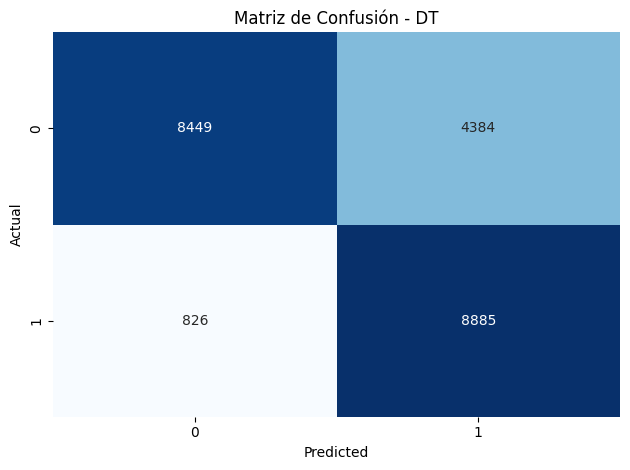

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model_DT.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusión - DT')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(model_DT, X_test, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(model_DT, X_test, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(model_DT, X_test, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(model_DT, X_test, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.98727 (+/- 0.00349)
Precision: 0.98628 (+/- 0.00484)
Recall: 0.98414 (+/- 0.00613)
F-measure: 0.98521 (+/- 0.00406)


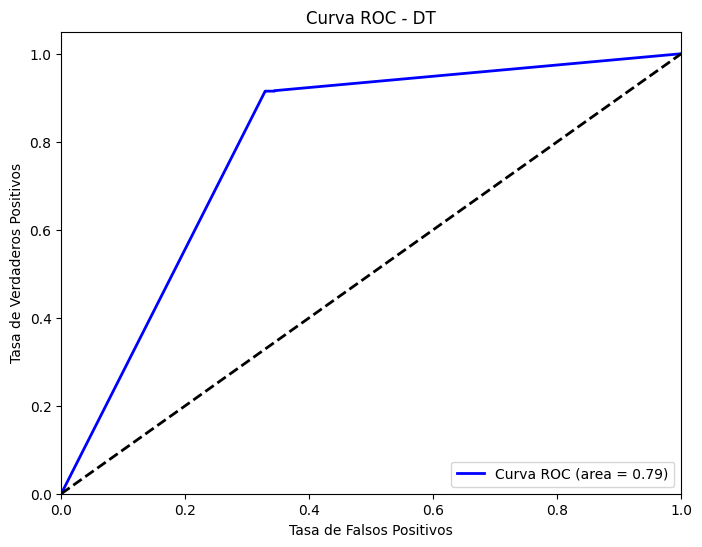

In [89]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Se genera la curva ROC para el Árbol de Decisión
y_pred_proba = model_DT.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Se traza la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - DT')
plt.legend(loc="lower right")
plt.show()

In [38]:
# Create a new DecisionTreeClassifier with the best parameters
model_DT_best = DecisionTreeClassifier(**best_params, random_state=0)

# Evaluate the model using cross-validation
accuracy = cross_val_score(model_DT_best, X_train, y_train, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(model_DT_best, X_train, y_train, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(model_DT_best, X_train, y_train, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(model_DT_best, X_train, y_train, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99813 (+/- 0.00082)
Precision: 0.99823 (+/- 0.00094)
Recall: 0.99826 (+/- 0.00100)
F-measure: 0.99825 (+/- 0.00077)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(random_state=0)
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
model_RF.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [40]:
model_RF.predict_proba(X_test)[0:10]

array([[1.        , 0.        ],
       [0.99      , 0.01      ],
       [0.07      , 0.93      ],
       [0.7       , 0.3       ],
       [0.40009524, 0.59990476],
       [0.13      , 0.87      ],
       [0.01      , 0.99      ],
       [0.04      , 0.96      ],
       [0.07      , 0.93      ],
       [0.01      , 0.99      ]])

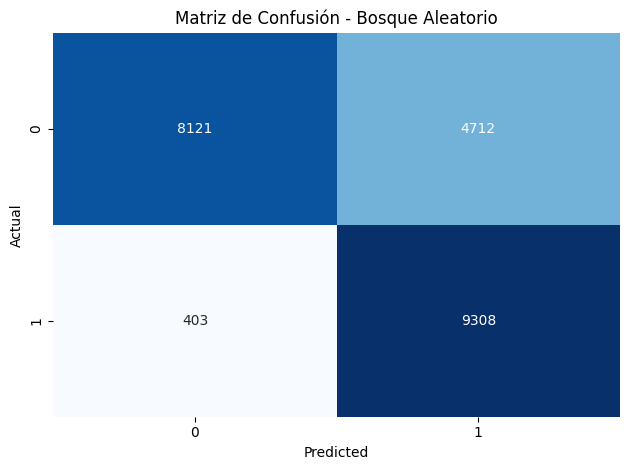

In [ ]:
y_pred = model_RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusión - RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [43]:
accuracy = cross_val_score(model_RF, X_test, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(model_RF, X_test, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(model_RF, X_test, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(model_RF, X_test, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.98802 (+/- 0.00465)
Precision: 0.98640 (+/- 0.00463)
Recall: 0.98579 (+/- 0.00939)
F-measure: 0.98609 (+/- 0.00545)


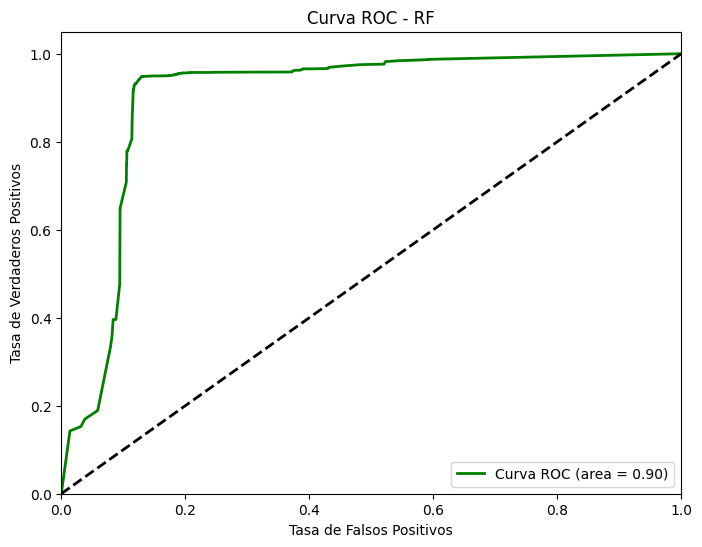

In [90]:
# Generate the ROC curve for the Random Forest model
y_pred_proba = model_RF.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - RF')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.svm import SVC

model_SVM=SVC(kernel='linear')
#model_DT.fit(X_train, y_train.astype(int)))
model_SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
model_SVM.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [48]:
model_SVM = SVC(kernel='linear', probability=True)
model_SVM.fit(X_train, y_train)
model_SVM.predict_proba(X_test)[0:10]

array([[0.99726187, 0.00273813],
       [0.95460194, 0.04539806],
       [0.42264207, 0.57735793],
       [0.54126376, 0.45873624],
       [0.53516819, 0.46483181],
       [0.04289292, 0.95710708],
       [0.08085212, 0.91914788],
       [0.66061223, 0.33938777],
       [0.02919243, 0.97080757],
       [0.41552941, 0.58447059]])

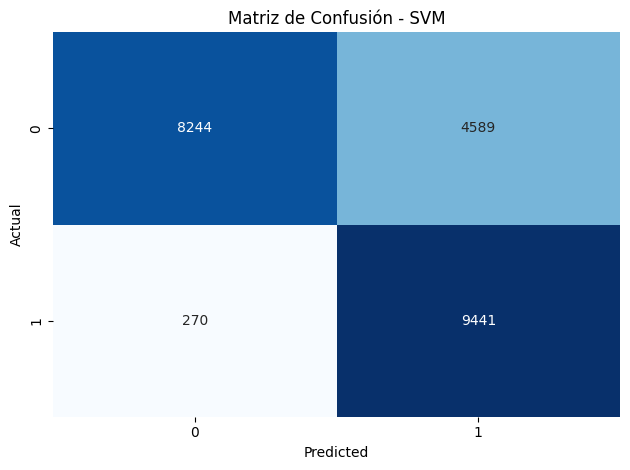

In [49]:
y_pred = model_SVM.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusión - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [51]:
accuracy = cross_val_score(model_SVM, X_test, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(model_SVM, X_test, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(model_SVM, X_test, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(model_SVM, X_test, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.92206 (+/- 0.00935)
Precision: 0.99430 (+/- 0.00571)
Recall: 0.82381 (+/- 0.02261)
F-measure: 0.90101 (+/- 0.01303)


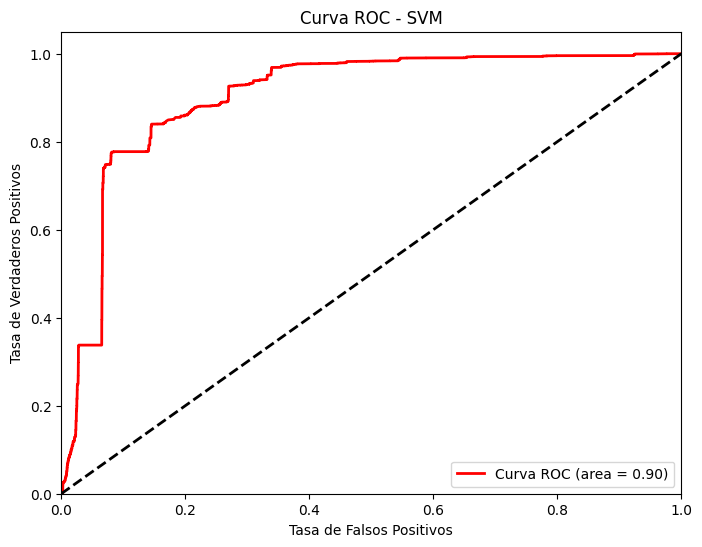

In [91]:
# Generate the ROC curve for the Support Vector Machine model
y_pred_proba = model_SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM')
plt.legend(loc="lower right")
plt.show()